<a href="https://colab.research.google.com/github/JeoungHojin/image_process/blob/main/moravec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

모라벡 알고리즘 수행 중... (픽셀 단위 계산이라 조금 걸립니다)


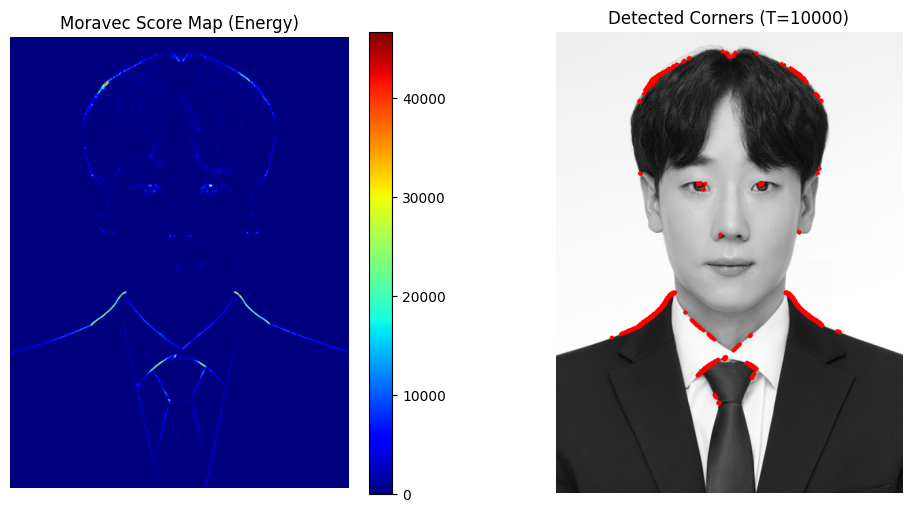

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/사진/1611a.jpg'
def moravec_corner_detection(img_path, window_size=3, threshold=2000):
    # 1. 이미지 로드 (그레이스케일 필수)
    src = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if src is None:
        print("이미지를 찾을 수 없습니다.")
        return

    h, w = src.shape
    # 결과 점수를 저장할 맵 (실수형)
    score_map = np.zeros((h, w), dtype=np.float32)

    # 윈도우 중심에서 가장자리까지의 거리 (3x3이면 offset=1)
    offset = window_size // 2

    print("모라벡 알고리즘 수행 중... (픽셀 단위 계산이라 조금 걸립니다)")

    # 2. 4방향 이동 정의 (상, 하, 좌, 우) [u, v]
    # 강의 자료의 (u, v) 이동 개념 적용
    shifts = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    # 3. 전체 픽셀 순회 (가장자리 제외)
    # shifted_window가 이미지 경계를 벗어나지 않도록 루프 범위를 조정합니다.
    # offset + 1은 shifted_window의 최대 확장 범위를 고려한 값입니다.
    for y in range(offset + 1, h - (offset + 1)):
        for x in range(offset + 1, w - (offset + 1)):

            ssds = []

            # 현재 윈도우 (기준)
            # ROI 추출: img[y_start : y_end, x_start : x_end]
            base_window = src[y-offset:y+offset+1, x-offset:x+offset+1].astype(np.float32)

            # 4. 4방향으로 윈도우를 밀어서 차이(SSD) 계산
            for dx, dy in shifts:
                # 이동한 윈도우
                shifted_window = src[y+dy-offset:y+dy+offset+1, x+dx-offset:x+dx+offset+1].astype(np.float32)

                # [핵심 수식] 제곱차의 합 (Sum of Squared Differences)
                diff = shifted_window - base_window
                ssd = np.sum(diff ** 2)
                ssds.append(ssd)

            # 5. 모라벡의 결정: "가장 변화가 적은 방향의 값을 내 점수로 한다"
            # Min 값을 취함으로써 에지(Edge)를 걸러냄
            score_map[y, x] = min(ssds)

    # 6. 결과 시각화 (임계값 적용)
    # 원본 컬러 이미지 준비
    result_img = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

    # 점수가 threshold보다 큰 곳 찾기
    corners = np.argwhere(score_map > threshold)

    # 빨간 점 찍기
    for y, x in corners:
        cv2.circle(result_img, (x, y), 3, (0, 0, 255), -1)

    # 출력
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title("Moravec Score Map (Energy)")
    plt.imshow(score_map, cmap='jet')
    plt.colorbar()
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f"Detected Corners (T={threshold})")
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

# --- 실행 ---
# 본인의 이미지 경로로 수정하세요

# threshold는 이미지 밝기나 대비에 따라 조절해야 함 (보통 1000 ~ 10000 사이)
moravec_corner_detection(img_path, threshold=10000)